In [50]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date 

In [12]:
train_data = pd.read_csv("train.csv" ,parse_dates = ['impression_time'], infer_datetime_format=True)
view_log = pd.read_csv("view_log.csv",parse_dates = ['server_time'], infer_datetime_format=True)
item_data = pd.read_csv("item_data.csv")

In [103]:
test_data = pd.read_csv("test.csv",parse_dates = ['impression_time'], infer_datetime_format=True)
submission_data= pd.read_csv("sample_submission.csv")

In [ ]:
#pandas_profiling.ProfileReport(train_data)

In [13]:
print(train_data.columns)
print(view_log.columns)
print(item_data.columns)

Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
       'is_4G', 'is_click'],
      dtype='object')
Index(['server_time', 'device_type', 'session_id', 'user_id', 'item_id'], dtype='object')
Index(['item_id', 'item_price', 'category_1', 'category_2', 'category_3',
       'product_type'],
      dtype='object')


In [14]:
print(train_data.head(10))

                      impression_id     impression_time  user_id  app_code  \
0  c4ca4238a0b923820dcc509a6f75849b 2018-11-15 00:00:00    87862       422   
1  45c48cce2e2d7fbdea1afc51c7c6ad26 2018-11-15 00:01:00    63410       467   
2  70efdf2ec9b086079795c442636b55fb 2018-11-15 00:02:00    71748       259   
3  8e296a067a37563370ded05f5a3bf3ec 2018-11-15 00:02:00    69209       244   
4  182be0c5cdcd5072bb1864cdee4d3d6e 2018-11-15 00:02:00    62873       473   
5  3416a75f4cea9109507cacd8e2f2aefc 2018-11-15 00:03:00    67352       409   
6  f457c545a9ded88f18ecee47145a72c0 2018-11-15 00:03:00    64356       190   
7  72b32a1f754ba1c09b3695e0cb6cde7f 2018-11-15 00:04:00    27329       481   
8  fc490ca45c00b1249bbe3554a4fdf6fb 2018-11-15 00:05:00    83318       386   
9  d2ddea18f00665ce8623e36bd4e3c7c5 2018-11-15 00:05:00    70206       190   

     os_version  is_4G  is_click  
0           old      0         0  
1        latest      1         1  
2  intermediate      1         0  
3

In [15]:
print(view_log.head(10))

          server_time device_type  session_id  user_id  item_id
0 2018-10-15 08:58:00     android      112333     4557    32970
1 2018-10-15 08:58:00     android      503590    74788     7640
2 2018-10-15 08:58:00     android      573960    23628   128855
3 2018-10-15 08:58:00     android      121691     2430    12774
4 2018-10-15 08:58:00     android      218564    19227    28296
5 2018-10-15 08:58:00     android      635314    87387    86660
6 2018-10-15 08:58:00     android      482459      348    35370
7 2018-10-15 08:58:00     android      218564    19227   100065
8 2018-10-15 08:58:00     android      947548    30183    86558
9 2018-10-15 08:58:00     android      941129    31754   127900


In [16]:
print(item_data.head(10))

   item_id  item_price  category_1  category_2  category_3  product_type
0    26880        4602          11          35          20          3040
1    54939        3513          12          57          85          6822
2    40383         825          17           8         279          1619
3     8777        2355          13          58         189          5264
4   113705        1267          17          39         151         10239
5   108843         953           9           9          90           703
6   129807       18118          16          56         188          2537
7    44250       17856          16          56          42          9641
8    49862        2868           7          23         219           842
9    77042        4032          17          55          58           623


In [17]:
print(test_data.head(10))

                      impression_id      impression_time  user_id  app_code  \
0  a9e7126a585a69a32bc7414e9d0c0ada  2018-12-13 07:44:00    44754       127   
1  caac14a5bf2ba283db7708bb34855760  2018-12-13 07:45:00    29656        44   
2  13f10ba306a19ce7bec2f3cae507b698  2018-12-13 07:46:00    25234       296   
3  39c4b4dc0e9701b55a0a4f072008fb3f  2018-12-13 07:47:00    22988       207   
4  bf5a572cca75f5fc67f4b14e58b11d70  2018-12-13 07:48:00    35431       242   
5  ca09514449e304fee91456fb0918667a  2018-12-13 07:48:00      489       207   
6  b8b35cb0ae1719aa9f0ba7a9f3785687  2018-12-13 07:49:00    44684       296   
7  33502d1e85818b9b3414c8c006c34e07  2018-12-13 07:50:00    76502       207   
8  5314e09fb680c56b58eb5a3b5b7bce0c  2018-12-13 07:50:00     2128       260   
9  e1a8a26385f49a5a7e04d34a5823bff3  2018-12-13 07:51:00    62337       207   

     os_version  is_4G  
0        latest      1  
1        latest      0  
2        latest      1  
3        latest      1  
4    

In [18]:
print(train_data.shape)
print(view_log.shape)
print(item_data.shape)

(237609, 7)
(3118622, 5)
(132761, 6)


In [21]:
print("Impression_Data",train_data.impression_time.describe())
print("Log_Data",view_log.server_time.describe())

Impression_Data count                  237609
unique                  36461
top       2018-12-04 00:01:00
freq                       46
first     2018-11-15 00:00:00
last      2018-12-13 07:43:00
Name: impression_time, dtype: object
Log_Data count                 3118622
unique                  82840
top       2018-11-14 23:20:00
freq                      146
first     2018-10-15 08:58:00
last      2018-12-11 23:59:00
Name: server_time, dtype: object


In [30]:
train_data['user_id'].value_counts()
#sns.countplot(x='user_id', data=train_data)
#plt.show()

71457    73
29947    70
59007    70
52082    67
68540    64
85051    63
65724    62
20823    60
3742     59
72494    59
89052    59
28222    58
91579    58
57028    58
71247    57
51168    57
43759    57
8667     57
450      57
21190    57
83534    56
66334    56
42126    55
52485    55
46714    55
29336    54
54552    54
41219    54
60522    54
48538    54
         ..
581       1
2628      1
10816     1
84460     1
70119     1
72166     1
68068     1
62043     1
55902     1
68196     1
35540     1
72422     1
78563     1
53983     1
56030     1
62171     1
58073     1
37591     1
39638     1
47826     1
66149     1
43728     1
25289     1
27336     1
6854      1
2756      1
8897      1
10944     1
82541     1
0         1
Name: user_id, Length: 74723, dtype: int64

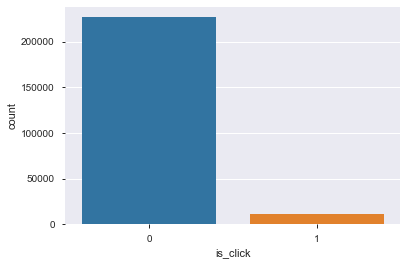

In [51]:
train_data['is_click'].value_counts()
sns.countplot(x='is_click',data=train_data)
plt.show()

In [160]:
### get unique user_id whose is_click is 1
unique_click =  train_data[train_data.is_click ==1]
unique_users_list=unique_click.user_id.unique()
print((unique_users_list[1:100]))
print(len(unique_users_list))

[74339 81926  8779  8636 13375 52485 24824 82558 56586 13600 63890 28111
 65869 81759 23850 41873 84678 31360 76325 17960  8184 41902 86693 17761
 47043 80195 43147 82945 90028 56788  8809 70713 71384 11106 18927 44965
 26336   784 28813 27575 49411 71177 66967 91403 46245 58641 12100 59702
 25114 24043 11651 35632 20077 50332 24344 19314 31427 14532 41626 81201
  3364 80420 75010 41041 43591 42209 17313 40829 71689 73943 22146 65877
 19970 83245 40772 88929 21230 47213 61900 25813 54210  3847 68058 62518
 21224 39934 29544 37023 60033 91339 44265 52401 11504  5427 50276 57423
   247 26904 66066]
7656


#### Joining basesd on user_id column to the log data and impersion data 
#### we need to keep only 7 days lag data so that we can compare whether it was buyed from the ad

In [26]:
train_log = pd.merge(view_log,train_data,on="user_id",how='left')

In [28]:
view_log.shape,train_data.shape,train_log.shape

((3118622, 5), (237609, 7), (11486867, 11))

In [40]:
(train_log.dtypes)

server_time        datetime64[ns]
device_type                object
session_id                  int64
user_id                     int64
item_id                     int64
impression_id              object
impression_time    datetime64[ns]
app_code                  float64
os_version                 object
is_4G                     float64
is_click                  float64
dtype: object

In [61]:
### Creating feature of number of days between the Server time and impersion time
train_log['diff_days'] = train_log['server_time'] - train_log['impression_time']
train_log['diff_days']=train_log['diff_days']/np.timedelta64(1,'D')

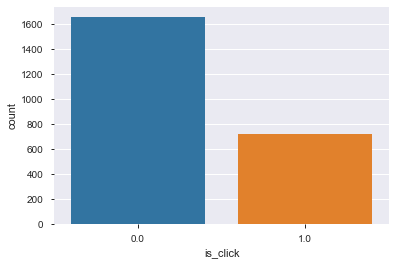

0.0    69.7
1.0    30.3
Name: is_click, dtype: float64

In [70]:
sample_data=train_log[(train_log.user_id == 784) & ((train_log.diff_days >= 0) & (train_log.diff_days < 8))] #& (train_log.is_click == 0)
sample_data['is_click'].value_counts()
sns.countplot(x='is_click',data=sample_data)
plt.show()
round((sample_data['is_click'].value_counts()/sample_data.shape[0]*100),2)

In [71]:
sample_data

,server_time,device_type,session_id,user_id,item_id,impression_id,impression_time,app_code,os_version,is_4G,is_click,diff_days
5783967,2018-11-15 00:22:00,android,750591,784,41188,92c8c96e4c37100777c7190b76d28233,2018-11-15 00:22:00,469.0,intermediate,0.0,1.0,0.000000
5794879,2018-11-15 01:15:00,android,1060930,784,76674,92c8c96e4c37100777c7190b76d28233,2018-11-15 00:22:00,469.0,intermediate,0.0,1.0,0.036806
5794885,2018-11-15 01:15:00,android,1060930,784,76674,99bcfcd754a98ce89cb86f73acc04645,2018-11-15 01:15:00,469.0,intermediate,0.0,1.0,0.000000
6609218,2018-11-18 18:38:00,android,203023,784,77340,92c8c96e4c37100777c7190b76d28233,2018-11-15 00:22:00,469.0,intermediate,0.0,1.0,3.761111
6609219,2018-11-18 18:38:00,android,203023,784,77340,fb6fd60c07bc9bbea558cf8a4dfe8080,2018-11-17 00:33:00,469.0,intermediate,0.0,0.0,1.753472
6609220,2018-11-18 18:38:00,android,203023,784,77340,6b3575c997eb8e46e71f91752bdfe41e,2018-11-18 18:38:00,469.0,intermediate,0.0,1.0,0.000000
6609224,2018-11-18 18:38:00,android,203023,784,77340,99bcfcd754a98ce89cb86f73acc04645,2018-11-15 01:15:00,469.0,intermediate,0.0,1.0,3.724306
6609225,2018-11-18 18:38:00,android,203023,784,77340,9a7e4d07ef8a46f82d97b848585ac16f,2018-11-16 20:50:00,469.0,intermediate,0.0,0.0,1.908333
6609227,2018-11-18 18:38:00,android,203023,784,77340,cd9dee20024dab5622a853bfb3f1bcfc,2018-11-16 20:09:00,469.0,intermediate,0.0,0.0,1.936806
6609228,2018-11-18 18:38:00,android,203023,784,77340,e6baae661f54db3aa1d9f76b2c893882,2018-11-17 00:46:00,469.0,intermediate,0.0,0.0,1.744444


In [73]:
print(submission_data.shape)
print(test_data.shape)

(90675, 2)
(90675, 6)


In [80]:
### Cut train data into 7 days differnence
train_data_final =  train_log[(train_log.diff_days >=0) & (train_log.diff_days <8) ]
print("Overall data dim" , train_log.shape)
print("7 days diff data  dim" , train_data_final.shape)

Overall data dim (11486867, 12)
7 days diff dim (1362050, 12)


In [97]:
train_data_final[train_data_final.server_time > train_data_final.impression_time ]

,server_time,device_type,session_id,user_id,item_id,impression_id,impression_time,app_code,os_version,is_4G,is_click,diff_days,item_price,category_1,category_2,category_3,product_type
1,2018-11-15 00:04:00,android,984956,8667,87872,c0c7c76d30bd3dcaefc96f40275bdc0a,2018-11-15 00:03:00,436.0,latest,0.0,1.0,0.000694,1031.0,14.0,61.0,132.0,4188.0
2,2018-11-15 00:04:00,android,848618,44965,111359,642e92efb79421734881b53e1e1b18b6,2018-11-15 00:03:00,409.0,old,0.0,1.0,0.000694,4345.0,1.0,28.0,314.0,4266.0
8,2018-11-15 00:10:00,android,234822,77237,99346,02522a2b2726fb0a03bb19f2d8d9524d,2018-11-15 00:09:00,249.0,latest,0.0,0.0,0.000694,1576.0,4.0,74.0,292.0,1945.0
9,2018-11-15 00:11:00,android,178502,56332,65785,a8baa56554f96369ab93e4f3bb068c22,2018-11-15 00:10:00,289.0,latest,1.0,1.0,0.000694,4467.0,9.0,44.0,16.0,7791.0
10,2018-11-15 00:12:00,android,924342,35657,17268,06409663226af2f3114485aa4e0a23b4,2018-11-15 00:11:00,3.0,latest,1.0,1.0,0.000694,4352.0,4.0,38.0,62.0,4911.0
11,2018-11-15 00:12:00,android,178502,56332,60983,a8baa56554f96369ab93e4f3bb068c22,2018-11-15 00:10:00,289.0,latest,1.0,1.0,0.001389,1670.0,13.0,78.0,1.0,6120.0
12,2018-11-15 00:13:00,android,178502,56332,72003,a8baa56554f96369ab93e4f3bb068c22,2018-11-15 00:10:00,289.0,latest,1.0,1.0,0.002083,2995.0,17.0,26.0,233.0,4389.0
14,2018-11-15 00:14:00,android,234822,77237,26221,02522a2b2726fb0a03bb19f2d8d9524d,2018-11-15 00:09:00,249.0,latest,0.0,0.0,0.003472,272.0,11.0,70.0,322.0,8411.0
16,2018-11-15 00:15:00,android,10563,74339,37822,43ec517d68b6edd3015b3edc9a11367b,2018-11-15 00:06:00,481.0,old,0.0,1.0,0.006250,11456.0,1.0,42.0,103.0,3432.0
17,2018-11-15 00:16:00,android,178502,56332,37889,a8baa56554f96369ab93e4f3bb068c22,2018-11-15 00:10:00,289.0,latest,1.0,1.0,0.004167,1856.0,17.0,39.0,252.0,9506.0


In [83]:
### now adding item features
train_data_final = pd.merge(train_data_final,item_data , on='item_id', how='left')

###### Train Data final  , Train_data_final

In [90]:
print(train_data_final.shape)
print(train_data_final.impression_time.describe())
print(train_data_final.server_time.describe())

(1362050, 17)
count                 1362050
unique                  32660
top       2018-12-02 00:01:00
freq                      566
first     2018-11-15 00:00:00
last      2018-12-11 23:57:00
Name: impression_time, dtype: object
count                 1362050
unique                  38047
top       2018-12-06 20:01:00
freq                      206
first     2018-11-15 00:01:00
last      2018-12-11 23:59:00
Name: server_time, dtype: object


### Bulding test data 

In [98]:
test_data.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [105]:
test_data_1 = pd.merge(view_log,test_data,on='user_id',how='left')
test_data_1.shape

(5669986, 10)

In [106]:
### Creating feature of number of days between the Server time and impersion time
test_data_1['diff_days'] = test_data_1['server_time'] - test_data_1['impression_time']
test_data_1['diff_days']=test_data_1['diff_days']/np.timedelta64(1,'D')

In [109]:
test_data_1=test_data_1.dropna()

In [111]:
test_data_1.shape

(3871697, 11)

In [137]:
test_data_1[(test_data_1.impression_time >= '2018-12-12 00:00:00') &  (test_data_1.diff_days >= -30)]

,server_time,device_type,session_id,user_id,item_id,impression_id,impression_time,app_code,os_version,is_4G,diff_days
2558872,2018-11-12 00:29:00,android,1067575,23950,89373,b5a84c8ae0efa5fc06415535c041fee1,2018-12-12 00:05:00,190.0,intermediate,0.0,-29.983333
2559094,2018-11-12 00:32:00,android,1067575,23950,88013,b5a84c8ae0efa5fc06415535c041fee1,2018-12-12 00:05:00,190.0,intermediate,0.0,-29.981250
2559194,2018-11-12 00:34:00,android,1067575,23950,31935,b5a84c8ae0efa5fc06415535c041fee1,2018-12-12 00:05:00,190.0,intermediate,0.0,-29.979861
2559374,2018-11-12 00:36:00,android,1067575,23950,12863,b5a84c8ae0efa5fc06415535c041fee1,2018-12-12 00:05:00,190.0,intermediate,0.0,-29.978472
2561632,2018-11-12 01:17:00,android,283625,71068,45087,4caf849e46ac1b71ba61ba86a1df14d9,2018-12-12 01:02:00,469.0,intermediate,0.0,-29.989583
2561689,2018-11-12 01:18:00,android,283625,71068,57598,4caf849e46ac1b71ba61ba86a1df14d9,2018-12-12 01:02:00,469.0,intermediate,0.0,-29.988889
2561702,2018-11-12 01:18:00,android,283625,71068,33736,4caf849e46ac1b71ba61ba86a1df14d9,2018-12-12 01:02:00,469.0,intermediate,0.0,-29.988889
2561847,2018-11-12 01:22:00,android,460439,32259,72120,4912eac444325e82211efef948c3de7c,2018-12-12 00:32:00,3.0,intermediate,0.0,-29.965278
2561881,2018-11-12 01:22:00,android,283625,71068,15641,4caf849e46ac1b71ba61ba86a1df14d9,2018-12-12 01:02:00,469.0,intermediate,0.0,-29.986111
2563099,2018-11-12 01:58:00,android,127066,77894,107282,5cba02ae127d1d0e2b5f9ccd2305866e,2018-12-12 00:57:00,145.0,old,0.0,-29.957639


##### Need to check on how many days we can go back and check the model

In [140]:
test_data_final = test_data_1[(test_data_1.impression_time >= '2018-12-12 00:00:00') &  (test_data_1.diff_days >= -8)]
test_data_final.shape

(338570, 11)

In [141]:
print(test_data_final.impression_time.describe())
print(len(test_data_final.impression_id.unique().tolist()))

count                  338570
unique                   9057
top       2018-12-13 13:20:00
freq                      419
first     2018-12-12 00:00:00
last      2018-12-18 23:59:00
Name: impression_time, dtype: object
42954


In [142]:
test_data_final = pd.merge(test_data_final,item_data,on='item_id',how='left')

In [148]:
test_data_final.isnull().sum()

server_time        0
device_type        0
session_id         0
user_id            0
item_id            0
impression_id      0
impression_time    0
app_code           0
os_version         0
is_4G              0
diff_days          0
item_price         0
category_1         0
category_2         0
category_3         0
product_type       0
dtype: int64

In [147]:
test_data_final = test_data_final.dropna()

In [152]:
print(train_data_final.columns) 
print(test_data_final.columns)
print(train_data_final.dtypes, test_data_final.dtypes)

Index(['server_time', 'device_type', 'session_id', 'user_id', 'item_id',
       'impression_id', 'impression_time', 'app_code', 'os_version', 'is_4G',
       'is_click', 'diff_days', 'item_price', 'category_1', 'category_2',
       'category_3', 'product_type'],
      dtype='object')
Index(['server_time', 'device_type', 'session_id', 'user_id', 'item_id',
       'impression_id', 'impression_time', 'app_code', 'os_version', 'is_4G',
       'diff_days', 'item_price', 'category_1', 'category_2', 'category_3',
       'product_type'],
      dtype='object')
server_time        datetime64[ns]
device_type                object
session_id                  int64
user_id                     int64
item_id                     int64
impression_id              object
impression_time    datetime64[ns]
app_code                  float64
os_version                 object
is_4G                     float64
is_click                  float64
diff_days                 float64
item_price                float64


In [159]:
print(train_data_final.device_type.value_counts())
print(train_data_final.category_1.value_counts())
print(train_data_final.category_2.value_counts())
print(train_data_final.category_3.value_counts())

android    1361689
iphone         331
web             30
Name: device_type, dtype: int64
9.0     179249
1.0     171595
17.0    170254
4.0     126012
13.0    109140
11.0    101512
14.0     77076
7.0      73649
8.0      70015
10.0     67496
16.0     58501
12.0     57779
0.0      51501
15.0     31649
6.0      15726
2.0          4
Name: category_1, dtype: int64
8.0     66527
38.0    61895
42.0    61025
3.0     59165
57.0    54329
39.0    53116
51.0    51710
74.0    47657
9.0     45243
44.0    44519
43.0    39836
58.0    35736
45.0    35465
62.0    33338
40.0    31834
61.0    31208
26.0    30563
7.0     29081
63.0    27660
35.0    25273
78.0    24248
28.0    24053
37.0    22877
36.0    21187
64.0    20108
0.0     18906
21.0    18576
67.0    18565
18.0    18411
41.0    17653
        ...  
47.0     8270
17.0     8135
55.0     7742
66.0     7445
20.0     7395
14.0     6413
72.0     5483
49.0     4511
79.0     3632
52.0     3479
10.0     2808
73.0     2256
77.0     2163
59.0     1898
54.0     1

In [164]:
train_data_final.head(4)

,server_time,device_type,session_id,user_id,item_id,impression_id,impression_time,app_code,os_version,is_4G,is_click,diff_days,item_price,category_1,category_2,category_3,product_type
0,2018-11-15 00:01:00,android,160586,47706,73227,1679091c5a880faf6fb5e6087eb1b2dc,2018-11-15 00:01:00,359.0,latest,1.0,1.0,0.000000,683.0,17.0,39.0,151.0,8834.0
1,2018-11-15 00:04:00,android,984956,8667,87872,c0c7c76d30bd3dcaefc96f40275bdc0a,2018-11-15 00:03:00,436.0,latest,0.0,1.0,0.000694,1031.0,14.0,61.0,132.0,4188.0
2,2018-11-15 00:04:00,android,848618,44965,111359,642e92efb79421734881b53e1e1b18b6,2018-11-15 00:03:00,409.0,old,0.0,1.0,0.000694,4345.0,1.0,28.0,314.0,4266.0
3,2018-11-15 00:06:00,android,683724,5824,58320,68d30a9594728bc39aa24be94b319d21,2018-11-15 00:06:00,465.0,latest,1.0,0.0,0.000000,1075.0,13.0,58.0,173.0,5358.0
